In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA

import pickle

In [4]:
def setaiddata():
    dirtstr = 'C:/Users/COM/KOSA_python/Project/MachineLearning_Project/'
    csvNames = ['aid(od)','aid(cent,fire_label)','aid(statmnt_tm)','aid(dong)','aid(jur)','aid(mt)'] # 확장자 제외하고 쓸것
    pktitle = dirtstr+'PK.csv' # pk파일명 넣을것
    aid_data = pd.read_csv(pktitle,encoding='utf-8-sig')
    for csvName in csvNames:
        title = dirtstr+ csvName +".csv"
        print(title)
        data = pd.read_csv(title,encoding='utf-8-sig')
        aid_data = pd.merge(aid_data, data, on='PK')
    print(aid_data.info())
    return aid_data

In [5]:
data = setaiddata()

C:/Users/COM/KOSA_python/Project/MachineLearning_Project/aid(od).csv
C:/Users/COM/KOSA_python/Project/MachineLearning_Project/aid(cent,fire_label).csv
C:/Users/COM/KOSA_python/Project/MachineLearning_Project/aid(statmnt_tm).csv
C:/Users/COM/KOSA_python/Project/MachineLearning_Project/aid(dong).csv
C:/Users/COM/KOSA_python/Project/MachineLearning_Project/aid(jur).csv
C:/Users/COM/KOSA_python/Project/MachineLearning_Project/aid(mt).csv
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3765058 entries, 0 to 3765057
Data columns (total 9 columns):
 #   Column               Dtype  
---  ------               -----  
 0   PK                   int64  
 1   ONSPOT_DSTN          float64
 2   GOUT_FIRESTTN_NM     int64  
 3   GOUT_SAFE_CENTER_NM  int64  
 4   STATMNT_TM           int64  
 5   EMRLF_EMD_NM         int64  
 6   JURISD_DIV_NM_CNT    int64  
 7   JURISD_DIV_NM_OUT    int64  
 8   MOVE_TM              float64
dtypes: float64(2), int64(7)
memory usage: 287.3 MB
None


In [6]:
data = data.drop(['PK'], axis=1)
data = data.dropna()

In [7]:
data.tail()

,ONSPOT_DSTN,GOUT_FIRESTTN_NM,GOUT_SAFE_CENTER_NM,STATMNT_TM,EMRLF_EMD_NM,JURISD_DIV_NM_CNT,JURISD_DIV_NM_OUT,MOVE_TM
3765053,1.4,7,57,20,109,1,0,8.0
3765054,4.3,7,57,16,198,1,0,16.0
3765055,2.3,7,57,18,737,1,0,14.0
3765056,2.3,7,57,23,737,1,0,9.0
3765057,0.1,7,57,4,264,1,0,8.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3765058 entries, 0 to 3765057
Data columns (total 8 columns):
 #   Column               Dtype  
---  ------               -----  
 0   ONSPOT_DSTN          float64
 1   GOUT_FIRESTTN_NM     int64  
 2   GOUT_SAFE_CENTER_NM  int64  
 3   STATMNT_TM           int64  
 4   EMRLF_EMD_NM         int64  
 5   JURISD_DIV_NM_CNT    int64  
 6   JURISD_DIV_NM_OUT    int64  
 7   MOVE_TM              float64
dtypes: float64(2), int64(6)
memory usage: 258.5 MB


## ML FLASK import 도전

In [10]:
X = data.iloc[:,0:-1]
print('사용한 독립변수들 :\n', X.columns)
y = data.iloc[:,-1]
print('종속변수 : ',y.name)

# X,y의 학습데이터, 테스트데이터 분리
print('데이터 분리중...')
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3)

사용한 독립변수들 :
 Index(['ONSPOT_DSTN', 'GOUT_FIRESTTN_NM', 'GOUT_SAFE_CENTER_NM', 'STATMNT_TM',
       'EMRLF_EMD_NM', 'JURISD_DIV_NM_CNT', 'JURISD_DIV_NM_OUT'],
      dtype='object')
종속변수 :  MOVE_TM
데이터 분리중...


In [11]:
from xgboost import XGBRegressor

XG_model = XGBRegressor().fit(train_X, train_y)

In [12]:
pickle.dump(XG_model, open('psb.pkl','wb'))

In [19]:
df = pd.DataFrame(columns=['ONSPOT_DSTN', 'GOUT_FIRESTTN_NM', 'GOUT_SAFE_CENTER_NM', 'STATMNT_TM',
       'EMRLF_EMD_NM', 'JURISD_DIV_NM_CNT', 'JURISD_DIV_NM_OUT'])
df=df.append({'ONSPOT_DSTN' : 1 , 'GOUT_FIRESTTN_NM' : 13, 'GOUT_SAFE_CENTER_NM' : 2, 'STATMNT_TM' : 1,
       'EMRLF_EMD_NM' : 1, 'JURISD_DIV_NM_CNT' : 1, 'JURISD_DIV_NM_OUT' : 0} , ignore_index=True)
df2 = df.astype(np.int64)
df3 = df2.ONSPOT_DSTN.astype(np.float64)
df2 = df2.drop(columns='ONSPOT_DSTN')
df4 = pd.concat((df3,df2), axis=1)

print(XG_model.predict(df4))

[5.433812]


In [18]:
df=df.append({'ONSPOT_DSTN' : 1 , 'GOUT_FIRESTTN_NM' : 13, 'GOUT_SAFE_CENTER_NM' : 2, 'STATMNT_TM' : 1,
       'EMRLF_EMD_NM' : 1, 'JURISD_DIV_NM_CNT' : 1, 'JURISD_DIV_NM_OUT' : 0} , ignore_index=True)
df

,ONSPOT_DSTN,GOUT_FIRESTTN_NM,GOUT_SAFE_CENTER_NM,STATMNT_TM,EMRLF_EMD_NM,JURISD_DIV_NM_CNT,JURISD_DIV_NM_OUT
0,1,13,2,1,1,1,0


In [64]:
df = data
lm2 = sm.OLS(df['MOVE_TM'], df[['GOUT_FIRESTTN_NM','GOUT_SAFE_CENTER_NM','STATMNT_TM',
                               'EMRLF_EMD_NM', 'JURISD_DIV_NM_CNT','ONSPOT_DSTN']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                MOVE_TM   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.870
Method:                 Least Squares   F-statistic:                          4.217e+06
Date:                Fri, 02 Apr 2021   Prob (F-statistic):                        0.00
Time:                        15:18:58   Log-Likelihood:                     -9.7843e+06
No. Observations:             3788553   AIC:                                  1.957e+07
Df Residuals:                 3788547   BIC:                                  1.957e+07
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
GOUT_FIRESTTN_NM        0.0549      0.000    326.317      0.000       0.055       0.055
GOUT_SAFE_CENTER_NM     0.0052   2.98e-05    176.348      0.000       0.005       0.005
STATMNT_TM              0.0787      0.000    346.873      0.000       0.078       0.079
EMRLF_EMD_NM            0.0016   6.28e-06    248.805      0.000       0.002       0.002
JURISD_DIV_NM_CNT       1.3081      0.004    322.978      0.000       1.300       1.316
ONSPOT_DSTN             1.3843      0.001   1425.237      0.000       1.382       1.386
==============================================================================
Omnibus:                   140131.571   Durbin-Watson:                   1.492
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           165445.298
Skew:                           0.443   Prob(JB):                         0.00
Kurtosis:                       3.512   Cond. No.                     1.46e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
pred_y = lm2.predict()

In [6]:
def modelscore_PCA(model,df, com=5):
    # df의 독립변수와 종속변수 분리    
    X = df.iloc[:,0:-1]
    print('사용한 독립변수들 :\n', X.columns)
    y = df.iloc[:,-1]
    print('종속변수 : ',y.name)
    
    # X,y의 학습데이터, 테스트데이터 분리
    print('데이터 분리중...')
    train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3)
    
    # 주성분 분석
    print('주성분 분석중...')
    pca = PCA(n_components=com)
    train_X_pca = pca.fit_transform(train_X)
    test_X_pca = pca.fit_transform(test_X)    
    
    # 모델학습
    print('모델 학습중...')
    model.fit(train_X_pca,train_y)
    
    #예측하기
    print('모델 예측중...')
    pred_train_y = model.predict(train_X_pca)
    pred_test_y = model.predict(test_X_pca)
    
    # 훈련데이터 셋을 이용한 평가
    print('---훈련데이터 셋을 이용한 평가---')
    print('결정계수 r2 : ',r2_score(train_y, pred_train_y))
    print('RMSE : ', math.sqrt(mean_squared_error(train_y, pred_train_y)))
    print('MAE : ', mean_absolute_error(train_y, pred_train_y))
    Rsquared = 1 - (1-model.score(train_X_pca,train_y))*(len(train_y)-1)/(len(train_y)-train_X_pca.shape[1]-1)
    print('수정된 결정계수(R-squared)를 위한 summary :\n',Rsquared) 
    
    # 테스트데이터 셋을 이용한 평가
    print('---테스트데이터 셋을 이용한 평가---')
    print('종속변수 예측평균 : ',pred_test_y.mean())
    print('종속변수 실제평균 : ',test_y.mean())
    print('결정계수 r2 : ',r2_score(test_y,pred_test_y))
    print('RMSE : ', math.sqrt(mean_squared_error(test_y, pred_test_y)))
    print('MAE : ',mean_absolute_error(test_y, pred_test_y))
    Rsquared = 1 - (1-model.score(test_X_pca,test_y))*(len(test_y)-1)/(len(test_y)-test_X_pca.shape[1]-1)
    print('수정된 결정계수(R-squared)를 위한 summary :\n',Rsquared)
    
    # 잔차의 정규성 확인
    print('띄워진 그래프는 잔차의 정규성을 확이하기 위한 그래프임.')
    fig= plt.figure()
    plt.scatter(test_y,pred_test_y)
    plt.xlabel("Target y")
    plt.ylabel("Predicted y")
    plt.title("Prediction vs. Actual")
    plt.show()
    return True

In [7]:
def modelscore(model,df):
    # df의 독립변수와 종속변수 분리    
    X = df.iloc[:,0:-1]
    print('사용한 독립변수들 :\n', X.columns)
    y = df.iloc[:,-1]
    print('종속변수 : ',y.name)
    
    # X,y의 학습데이터, 테스트데이터 분리
    print('데이터 분리중...')
    train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3)
    
    # 모델학습
    print('모델 학습중...')
    model.fit(train_X,train_y)
    
    #예측하기
    print('모델 예측중...')
    pred_train_y = model.predict(train_X)
    pred_test_y = model.predict(test_X)
    
    # 훈련데이터 셋을 이용한 평가
    print('---훈련데이터 셋을 이용한 평가---')
    print('결정계수 r2 : ',r2_score(train_y, pred_train_y))
    print('RMSE : ', math.sqrt(mean_squared_error(train_y, pred_train_y)))
    print('MAE : ', mean_absolute_error(train_y, pred_train_y))
    Rsquared = 1 - (1-model.score(train_X,train_y))*(len(train_y)-1)/(len(train_y)-train_X.shape[1]-1)
    print('수정된 결정계수(R-squared)를 위한 summary :\n',Rsquared) 
    
    # 테스트데이터 셋을 이용한 평가
    print('---테스트데이터 셋을 이용한 평가---')
    print('종속변수 예측평균 : ',pred_test_y.mean())
    print('종속변수 실제평균 : ',test_y.mean())
    print('결정계수 r2 : ',r2_score(test_y,pred_test_y))
    print('RMSE : ', math.sqrt(mean_squared_error(test_y, pred_test_y)))
    print('MAE : ',mean_absolute_error(test_y, pred_test_y))
    Rsquared = 1 - (1-model.score(test_X,test_y))*(len(test_y)-1)/(len(test_y)-test_X.shape[1]-1)
    print('수정된 결정계수(R-squared)를 위한 summary :\n',Rsquared)
    
    # 잔차의 정규성 확인
    print('띄워진 그래프는 잔차의 정규성을 확이하기 위한 그래프임.')
    fig= plt.figure()
    plt.scatter(test_y,pred_test_y)
    plt.xlabel("Target y")
    plt.ylabel("Predicted y")
    plt.title("Prediction vs. Actual")
    plt.show()
    return True

<AxesSubplot:>

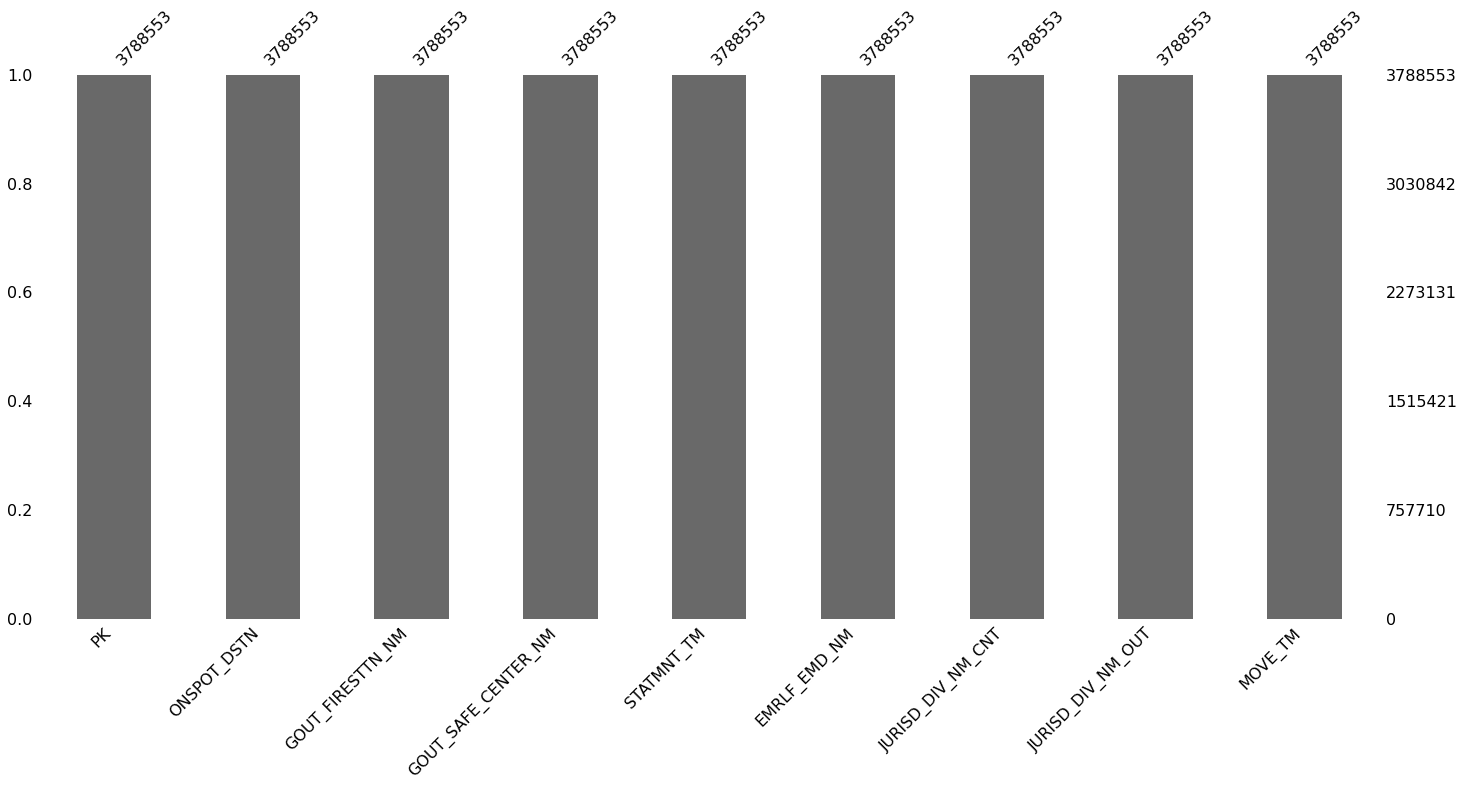

In [34]:
import missingno
missingno.bar(data)

In [12]:
from xgboost import XGBRegressor

my_model = XGBRegressor() 

사용한 독립변수들 :
 Index(['ONSPOT_DSTN', 'GOUT_FIRESTTN_NM', 'GOUT_SAFE_CENTER_NM', 'STATMNT_TM',
       'EMRLF_EMD_NM', 'JURISD_DIV_NM_CNT', 'JURISD_DIV_NM_OUT'],
      dtype='object')
종속변수 :  MOVE_TM
데이터 분리중...
주성분 분석중...
모델 학습중...
모델 예측중...
---훈련데이터 셋을 이용한 평가---
결정계수 r2 :  0.37526763075445857
RMSE :  2.6640346773304877
MAE :  2.056834562523285
수정된 결정계수(R-squared)를 위한 summary :
 0.375266452894645
---테스트데이터 셋을 이용한 평가---
종속변수 예측평균 :  8.228003
종속변수 실제평균 :  8.2087551448838
결정계수 r2 :  0.34769166371669613
RMSE :  2.7237260609047027
MAE :  2.1104635909793945
수정된 결정계수(R-squared)를 위한 summary :
 0.3476887940558938
띄워진 그래프는 잔차의 정규성을 확이하기 위한 그래프임.


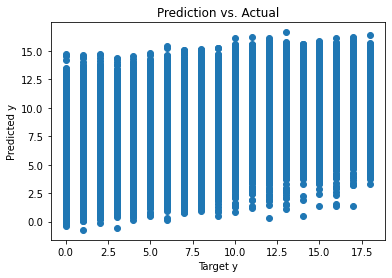

True

In [15]:
modelscore_PCA(my_model,data, com=5)

In [11]:
from sklearn import ensemble

RF_Model = ensemble.RandomForestRegressor(n_estimators=50,
                    max_depth=None, max_features=4,
                    oob_score=False, random_state=1)

사용한 독립변수들 :
 Index(['ONSPOT_DSTN', 'GOUT_FIRESTTN_NM', 'GOUT_SAFE_CENTER_NM', 'STATMNT_TM',
       'EMRLF_EMD_NM', 'JURISD_DIV_NM_CNT', 'JURISD_DIV_NM_OUT'],
      dtype='object')
종속변수 :  MOVE_TM
데이터 분리중...
주성분 분석중...
모델 학습중...
모델 예측중...
---훈련데이터 셋을 이용한 평가---
결정계수 r2 :  0.5293388289982914
RMSE :  2.3126235419933323
MAE :  1.732955506874281
수정된 결정계수(R-squared)를 위한 summary :
 0.5293379416217021
---테스트데이터 셋을 이용한 평가---
종속변수 예측평균 :  8.230457611536254
종속변수 실제평균 :  8.211242461942378
결정계수 r2 :  0.3687268194516454
RMSE :  2.6786142986285024
MAE :  2.061826513184591
수정된 결정계수(R-squared)를 위한 summary :
 0.3687240423295377
띄워진 그래프는 잔차의 정규성을 확이하기 위한 그래프임.


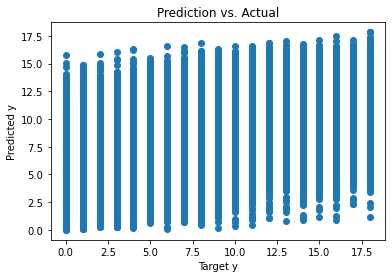

True

In [12]:
modelscore_PCA(RF_Model,data, com=5)

In [62]:
X = sm.add_constant(X)

results = sm.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                MOVE_TM   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                 2.335e+05
Date:                Fri, 02 Apr 2021   Prob (F-statistic):               0.00
Time:                        15:14:21   Log-Likelihood:            -9.3835e+06
No. Observations:             3788553   AIC:                         1.877e+07
Df Residuals:                 3788546   BIC:                         1.877e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   7.0492      0.007    944.843      0.000       7.035       7.064
ONSPOT_DSTN             0.9939      0.001   1028.327      0.000       0.992       0.996
GOUT_FIRESTTN_NM        0.0019      0.000     11.465      0.000       0.002       0.002
GOUT_SAFE_CENTER_NM    -0.0013   2.76e-05    -45.327      0.000      -0.001      -0.001
STATMNT_TM              0.0005      0.000      2.227      0.026    5.87e-05       0.001
EMRLF_EMD_NM           -0.0002   5.94e-06    -26.450      0.000      -0.000      -0.000
JURISD_DIV_NM_CNT      -1.3466      0.005   -292.665      0.000      -1.356      -1.338
==============================================================================
Omnibus:                   256972.705   Durbin-Watson:                   1.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           325330.714
Skew:                           0.640   Prob(JB):                         0.00
Kurtosis:                       3.651   Cond. No.                     3.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
X = data.iloc[:,1:-2]
print('사용한 독립변수들 :\n', X.columns)
y = data.iloc[:,-1]
print('종속변수 : ',y.name)

# X,y의 학습데이터, 테스트데이터 분리
print('데이터 분리중...')
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3)

사용한 독립변수들 :
 Index(['ONSPOT_DSTN', 'GOUT_FIRESTTN_NM', 'GOUT_SAFE_CENTER_NM', 'STATMNT_TM',
       'EMRLF_EMD_NM', 'JURISD_DIV_NM_CNT'],
      dtype='object')
종속변수 :  MOVE_TM
데이터 분리중...


In [53]:
results2 = sm.OLS.from_formula("MOVE_TM ~ GOUT_SAFE_CENTER_NM + ONSPOT_DSTN + EMRLF_EMD_NM", data=data)

In [54]:
results2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                MOVE_TM   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                 4.288e+05
Date:                Fri, 02 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:56:40   Log-Likelihood:            -9.4259e+06
No. Observations:             3788553   AIC:                         1.885e+07
Df Residuals:                 3788549   BIC:                         1.885e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.7269      0.004   1281.797      0.000       5.718       5.736
GOUT_SAFE_CENTER_NM    -0.0013   2.79e-05    -47.129      0.000      -0.001      -0.001
ONSPOT_DSTN             1.0651      0.001   1130.615      0.000       1.063       1.067
EMRLF_EMD_NM           -0.0001   5.98e-06    -22.558      0.000      -0.000      -0.000
==============================================================================
Omnibus:                   251930.050   Durbin-Watson:                   1.611
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           314734.331
Skew:                           0.639   Prob(JB):                         0.00
Kurtosis:                       3.601   Cond. No.                     1.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
#랜덤 포레스트를 다양한 수준에서 돌려보고 
#그 결과값을 각각의 MAE를 시각화 해볼 수 있도록

X = data.iloc[:,1:-2].to_numpy()
Y = data.iloc[:,-1].to_numpy()


xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.3, random_state = 531)

print(len(xTrain), len(xTest))

mseOos = []

nTreeList = range(5, 50, 10)

for iTrees in nTreeList:
    depth = None
    maxFeat = 4 #조정해볼 것
    wineRFModel = ensemble.RandomForestRegressor(n_estimators=iTrees,
                    max_depth=depth, max_features=maxFeat,
                    oob_score=False, random_state=328)
    wineRFModel.fit(xTrain, yTrain)
    #데이터 세트에 대한 MSE 누적
    prediction = wineRFModel.predict(xTest)
    mseOos.append(mean_absolute_error(yTest, prediction))
print("MAE")
print(mseOos)

2651987 1136566
MAE
[2.0881163462126575, 2.066511614513516, 2.062207878256858, 2.060453600446211, 2.0595276909615206]


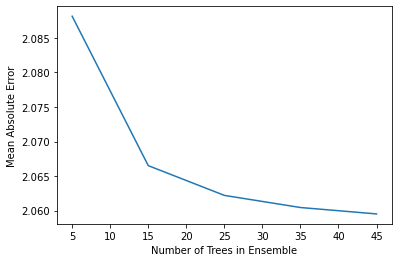

NameError: name 'df_goni' is not defined

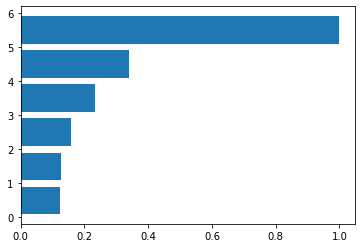

In [68]:
plt.plot(nTreeList, mseOos)
plt.xlabel('Number of Trees in Ensemble')
plt.ylabel('Mean Absolute Error')
#plot.ylim([0.0, 1.1*max(mseOob)])
plt.show()

#피처 중요도 도표 그리기
featureImportance = wineRFModel.feature_importances_

#가장 높은 중요도 기준으로 스케일링
featureImportance = featureImportance/featureImportance.max()
sorted_idx = np.argsort(featureImportance)
barPos = np.arange(sorted_idx.shape[0])+.5
plt.barh(barPos, featureImportance[sorted_idx], align='center')
plt.yticks(barPos, df_goni.columns[sorted_idx])
plt.xlabel('Variable Importance')
plt.show()

In [9]:
from sklearn.ensemble import AdaBoostRegressor

ada_model = AdaBoostRegressor() 

사용한 독립변수들 :
 Index(['ONSPOT_DSTN', 'GOUT_FIRESTTN_NM', 'GOUT_SAFE_CENTER_NM', 'STATMNT_TM',
       'EMRLF_EMD_NM', 'JURISD_DIV_NM_CNT', 'JURISD_DIV_NM_OUT'],
      dtype='object')
종속변수 :  MOVE_TM
데이터 분리중...
모델 학습중...
모델 예측중...
---훈련데이터 셋을 이용한 평가---
결정계수 r2 :  0.21895136641027058
RMSE :  2.979565928009277
MAE :  2.430428245300494
수정된 결정계수(R-squared)를 위한 summary :
 0.21894930480252972
---테스트데이터 셋을 이용한 평가---
종속변수 예측평균 :  8.983426263959771
종속변수 실제평균 :  8.204791450738453
결정계수 r2 :  0.21837901579611685
RMSE :  2.979563363770438
MAE :  2.429628181426612
수정된 결정계수(R-squared)를 위한 summary :
 0.21837420183423428
띄워진 그래프는 잔차의 정규성을 확이하기 위한 그래프임.


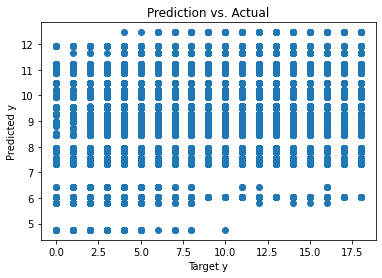

True

In [10]:
modelscore(ada_model,data)